In [42]:
path = "/content/drive/MyDrive/dog_cat/training/"
testing_path = '/content/drive/MyDrive/dog_cat/testing/'

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
pip install tensorflow-addons

Testing of pretrained model to use the Spatial Pyramid pooling layer from the SPPNet and used in the pre-trained model of vgg16 to have a different shaped images as a input

In [9]:
import tensorflow.keras as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow as tf1 
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.applications.vgg16 import VGG16
import cv2
import tensorflow_addons as tfa

In [10]:
vgg_model = VGG16(include_top = False)

58900480/58889256 [==============================] - 1s 0us/step


In [11]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [12]:
spatial_pyramid_pooling = tfa.layers.SpatialPyramidPooling2D(bins = [[1,1], [3, 3], [5, 5]])

In [13]:
model = tf.Sequential()

counter = 0
for layer in vgg_model.layers:
  layer.trainable = False
  model.add(layer)
model.add(spatial_pyramid_pooling)

In [14]:
model.add(
    tf.layers.Flatten()
)

In [15]:
model.add(
    tf.layers.Dense(512, activation = 'relu')
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0         
                                                                 
 block3_conv1 (Conv2D)       (None, None, None, 256)   2

In [44]:
# Reading the Data

img_gen = ImageDataGenerator(
    rescale = 1./255.0
)

In [45]:
train_data = DirectoryIterator(
    path, 
    img_gen,
  #  target_size = (224, 224),
    batch_size = 20,
    class_mode = 'categorical',
    subset = 'training',
    shuffle = True, 
    seed = 43,
    color_mode = 'rgb',
    classes = ['cat', 'dog']
)

testing_data = DirectoryIterator(
     testing_path, 
     img_gen,

  #  target_size = (224, 224),
    batch_size = 20,
    class_mode = 'categorical',
   # subset = 'validation',
    shuffle = True, 
    seed = 43,
    color_mode = 'rgb',
    classes = ['cat', 'dog']
)

Found 250 images belonging to 2 classes.
Found 91 images belonging to 2 classes.


In [19]:
output_layer = tf.layers.Dense(
    units = 2, activation = 'softmax'
)

In [20]:
model.add(output_layer)

In [21]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0         
                                                                 
 block3_conv1 (Conv2D)       (None, None, None, 256)   2

In [22]:
model.compile(
    loss = tf.losses.categorical_crossentropy,
    optimizer = tf.optimizers.Adam(learning_rate = 0.0001),
    metrics = 'accuracy'
)

In [46]:
history = model.fit(
    train_data, batch_size = 20, epochs = 15, validation_data = testing_data, validation_batch_size = 20
)

Epoch 1/15
13/13 [==============================] - 44s 4s/step - loss: 0.2317 - accuracy: 0.9040 - val_loss: 0.3443 - val_accuracy: 0.8901
Epoch 2/15
13/13 [==============================] - 17s 1s/step - loss: 0.1019 - accuracy: 0.9760 - val_loss: 0.3978 - val_accuracy: 0.8352
Epoch 3/15
13/13 [==============================] - 18s 1s/step - loss: 0.0734 - accuracy: 0.9840 - val_loss: 0.3783 - val_accuracy: 0.8242
Epoch 4/15
13/13 [==============================] - 18s 1s/step - loss: 0.0343 - accuracy: 1.0000 - val_loss: 0.3137 - val_accuracy: 0.8462
Epoch 5/15
13/13 [==============================] - 18s 1s/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.3030 - val_accuracy: 0.8571
Epoch 6/15
13/13 [==============================] - 18s 1s/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.2980 - val_accuracy: 0.8571
Epoch 7/15
13/13 [==============================] - 18s 1s/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.2956 - val_accuracy: 0.8571
Epoch 8/15
13/13 [==

In [24]:
model.save('dog_cat.h5')

In [25]:
image_location = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjLAl9xxJzpKO6AJobnBQg9q3dqZXq--KVuw&usqp=CAU'

(225, 225, 3)


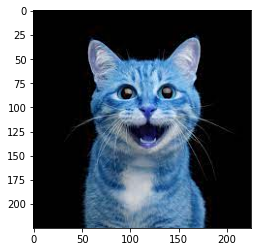

In [53]:
img = cv2.imread('/content/test3.jpeg')
print(img.shape)
plt.imshow(img, cmap = 'gray')

In [54]:
img = img.reshape(1, 225, 225, 3)



In [55]:
model.predict(img)

array([[1., 0.]], dtype=float32)

In [56]:
testing_data

['cat', 'dog']